In [1]:
# Following is the Code for comparators of two numbers (3-Qubits) provided example of Num1:(a1:1)(a2:1)(a3:1)=111=7 and Num2:(b1:0)(b2:1)(b3:1)=011=3
# problem statement it's comparing first two bits of each number but as soon as we move towards second set a2,b2 it shows zero 
# the issue is in both 2 bit comparator and 3 bit comparator

In [2]:
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor 
import math

In [3]:
qr = QuantumRegister(4)
circuit = QuantumCircuit(qr)

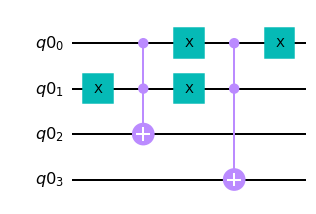

In [4]:
# UC

circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[3])
circuit.x(qr[0])

circuit.draw(output='mpl')

In [5]:
# Making UC circuit a gate

UC = circuit.to_gate()
type(UC)

qiskit.circuit.gate.Gate

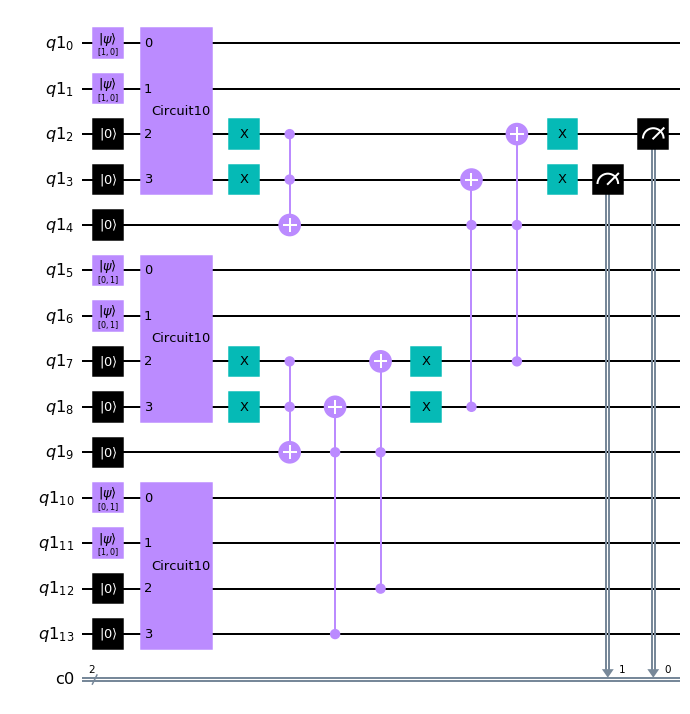

In [6]:
com = QuantumRegister(14)
mea = ClassicalRegister(2)
#first = ClassicalRegister(3)
#second = ClassicalRegister(3)
#circuit1 = QuantumCircuit(com,mea,first,second)
circuit1 = QuantumCircuit(com,mea)

initial=[[1,0],[0,1]]
circuit1.initialize(initial[1], 10)
circuit1.initialize(initial[1], 5)
circuit1.initialize(initial[0], 0)

circuit1.initialize(initial[0], 11)
circuit1.initialize(initial[1], 6)
circuit1.initialize(initial[0], 1)

#circuit1.measure(com[0],  mea[0])
#circuit1.measure(com[5],  mea[1])
#circuit1.measure(com[10], mea[2])

#circuit1.measure(com[1],  second[0])
#circuit1.measure(com[6],  second[1])
#circuit1.measure(com[11], second[2])

circuit1.reset(com[2])
circuit1.reset(com[3])
circuit1.reset(com[4])
circuit1.reset(com[7])
circuit1.reset(com[8])
circuit1.reset(com[9])
circuit1.reset(com[12])
circuit1.reset(com[13])

# Comparator Design
circuit1.append(UC,[0,1,2,3])
circuit1.append(UC,[5,6,7,8])
circuit1.append(UC,[10,11,12,13])

# Applying X and CNOT Gates

circuit1.x(com[2])
circuit1.x(com[3])


circuit1.x(com[7])
circuit1.x(com[8])


circuit1.ccx(com[2],com[3],com[4])
circuit1.ccx(com[7],com[8],com[9])
circuit1.ccx(com[13],com[9],com[8])
circuit1.ccx(com[12],com[9],com[7])

circuit1.x(com[7])
circuit1.x(com[8])

circuit1.ccx(com[8],com[4],com[3])
circuit1.ccx(com[7],com[4],com[2])



circuit1.x(com[2])
circuit1.x(com[3])



# Measuring Significant bits
circuit1.measure(com[2], mea[0])
circuit1.measure(com[3], mea[1])


circuit1.draw(output='mpl')

In [7]:
simulator = Aer.get_backend('statevector_simulator')

{1: 1}


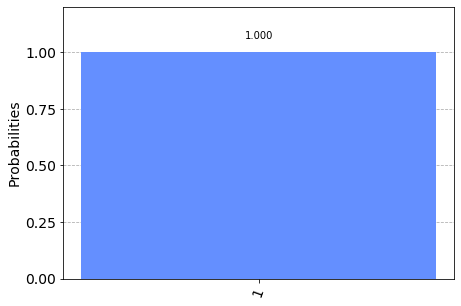

In [8]:
result = execute(circuit1, backend = simulator, shots = 1).result()
counts = result.get_counts()

counts = counts.int_outcomes()
print(counts)
#state = result.get_statevector()
#print(state)
plot_histogram(counts)

In [9]:
#print(result)

configrc.store_credentials:WARNING:2021-01-07 10:58:01,381: Credentials already present. Set overwrite=True to overwrite.
/home/hamza/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


{1: 1}


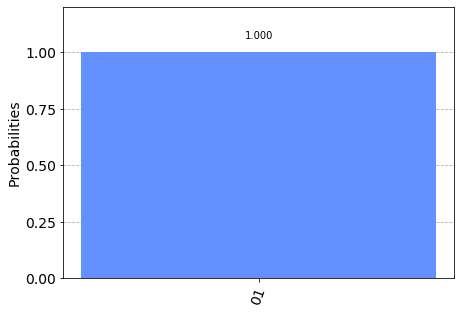

In [10]:
#Sending job to run over IBM provided Server


IBMQ.save_account('2a18c21d0290fdae39f5415414efdb49a4dfe503d8101a3ee4afd6e6da6ead34bf084b82f1f73c097f2be712dcbf4aadc1e0c07bae0117abf0ff16442c293b25')

IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne') 

job = execute(circuit1, backend=qcomp)
print(counts)
plot_histogram(result.get_counts(circuit1))